# Supervised Learning with Scikit Learn 

The goal of supervised learning is to predict a doctor’s diagnosis or to make predictions about the future say whether a customer will click on an add or not. For supervised learning, we need labeled data and there are many ways to get it, we can get historical data which already has labels that we are interested in; we can perform experiments to get labeled data, such as A/B testing to see how many clicks we get, or we can also get crowdsourced labeling data which, like reCAPTCHA does for text recognition. In any case, the goal is to learn from data for which the right output is known, so that we can make predictions on new data for which we don’t know the output. 

There are many ways to perform supervised learning in Python. Below I have used fundamentals of supervised learning using various real life datasets and used various techniques like exploratory data analysis, visualize EDA, imputing numberical and categorical missing values using complex techniques like KNN. I also used regularization techniques such and Lasso and Ridge regression that also helps to identify features with most profound impact on the dependent variable. Making this document has provided me with more than adequate experience, knowledge and tools to pre process and clean data and to run classification and regression problems on any data in any industry.  

###### Supervised Learning and Classification

Working on the IRIS dataset to predict flower species based on different petal measures. 

In [823]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [824]:
# importing iris dataset
iris = datasets.load_iris()

In [825]:
# checking the type
type(iris)

sklearn.utils.Bunch

In [ ]:
The type is Bunch which is similar to a dictionary that contains key value pairs. 

In [826]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
DESCR is the description of the data, we have data: features, target variable, target_names: target variable name, feature_names: feature variable names, and filename)

In [828]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
data and target are numpy arrays. 

In [830]:
iris.data.shape

(150, 4)

In [ ]:
The dot shape attribute of the array feature tells us that there are 150 rows and 4 columns. Samples are in rows and features are in columns. 


In [831]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
Exploratory data analysis

In [832]:
X = iris.data
y = iris.target

In [837]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [835]:
# We will build a DataFrame of the feature data using pd dot DataFrame and alsp passing column names. 
df = pd.DataFrame(X, columns=iris.feature_names)

In [836]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


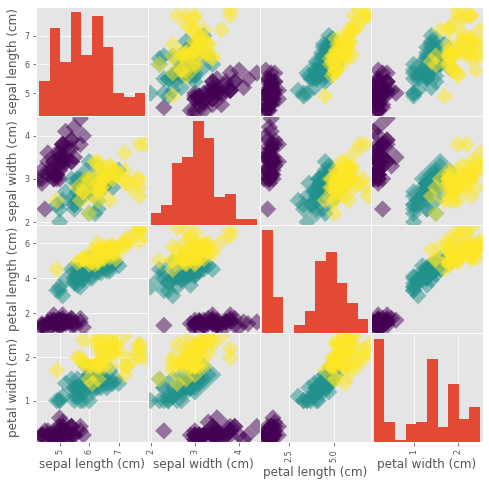

In [851]:
# Visual analysis of the dataset
_ = pd.plotting.scatter_matrix(df, c = y, s = 150, marker = 'D', figsize = [8,8]) 

The result is a matrix of figures which containts very useful information. On the diagonal are the histograms of the features corresponding to the row and column. 

The off-diagonal figures are scatter plots of the column features versus row features colored by the target variable. 

For example we can see that petal length and petal width are highly correlated in the second box from bottom on the extreme right column. And flowers are clustered according to species. 


###### Exploratory data analysis

I'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.

I will perform Exploratory data analysis (EDA) in order to understand the structure of the data.

In [940]:
# Importing the dataset 
# Creating list of column names for the data
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
# Load dataset: df_kidney
df = pd.read_csv('voting.csv', names=col_names,
                        na_values='?')
df.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


###### Numerical EDA

The DataFrame has a total of 435 rows and 17 columns.

All of the columns are of type object.

The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.

There are 16 predictor variables, or features, in this DataFrame.

The target variable in this DataFrame is 'party'.

As we can see there are missing values in the dataset. I will be computing missing values using KNN.

In [941]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in df:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in df
    df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)


# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the df5 DataFrame
df.iloc[:, :] = np.round(KNN_imputer.fit_transform(df))

# Loop over the column names in df
for col_name in df:
    
    # Reshape the data
    reshaped = df[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    df[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)


Imputing row 1/435 with 1 missing, elapsed time: 0.167
Imputing row 101/435 with 0 missing, elapsed time: 0.189
Imputing row 201/435 with 0 missing, elapsed time: 0.195
Imputing row 301/435 with 0 missing, elapsed time: 0.199
Imputing row 401/435 with 5 missing, elapsed time: 0.206


###### Visual EDA

The Numerical EDA I did in the previous exercise gave some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give an even better understanding of the data. All the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

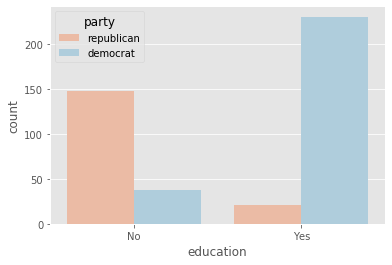

In [895]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like republicans voted resoundingly against this bill, compared to Democrats. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!


I will explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans?

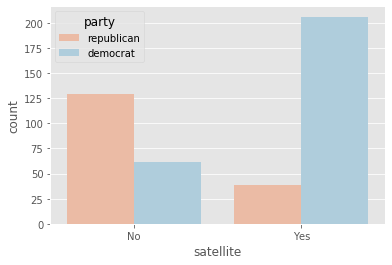

In [896]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

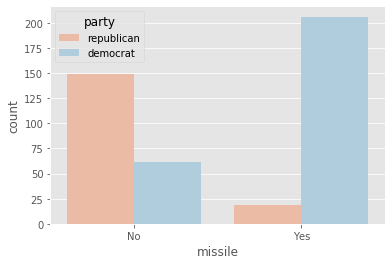

In [897]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats vote in favor of both 'satellite' and 'missile'.

###### Fitting the first classifier using scikit learn on iris data. 

In [902]:
iris['data'].shape

(150, 4)

150 observations with 4 features. 

In [900]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

I have fitted the classifier now I can use it on unlabelled data like below. 

In [903]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
       [5.7, 2.6, 3.8, 1.3],
       [4.7, 3.2, 1.3, 0.2]])
Prediction = knn.predict(X_new)


In [905]:
Prediction 

array([1, 1, 0])

In [906]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

1 is versicolor and 0 is setosa. 

Changing the output array into a dataframe in case we need to export the result in an excel file to our working directory and to present the results. 

In [907]:
df1 = pd.DataFrame(Prediction)

In [908]:
df1

,0
0,1
1,1
2,0


In [943]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


Creating dummy variables to fit above data into a model 

In [944]:
# Replace label values with 0 (ckd) and 1
df['party'].replace({'republican':0, 'democrat':1}, inplace=True)

In [947]:
# Create dummy variables: df_region
df_party = pd.get_dummies(df)

# Print the columns of df_region
print(df_party.columns)

# Create dummy variables with drop_first=True: df_region
df_party = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_party.columns)

Index(['party', 'infants_n', 'infants_y', 'water_n', 'water_y', 'budget_n',
       'budget_y', 'physician_n', 'physician_y', 'salvador_n', 'salvador_y',
       'religious_n', 'religious_y', 'satellite_n', 'satellite_y', 'aid_n',
       'aid_y', 'missile_n', 'missile_y', 'immigration_n', 'immigration_y',
       'synfuels_n', 'synfuels_y', 'education_n', 'education_y', 'superfund_n',
       'superfund_y', 'crime_n', 'crime_y', 'duty_free_exports_n',
       'duty_free_exports_y', 'eaa_rsa_n', 'eaa_rsa_y'],
      dtype='object')
Index(['party', 'infants_y', 'water_y', 'budget_y', 'physician_y',
       'salvador_y', 'religious_y', 'satellite_y', 'aid_y', 'missile_y',
       'immigration_y', 'synfuels_y', 'education_y', 'superfund_y', 'crime_y',
       'duty_free_exports_y', 'eaa_rsa_y'],
      dtype='object')


In [953]:
X = df_party.drop('party', axis =1).values
y = df_party['party'].values

In [954]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [963]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

,0
0,0
1,0
2,1
3,1
4,1


In [966]:
X_new = np.array([[0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 0.684832, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678, 0.398044, 0.737995]])

In [969]:
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: [1]


The model predicted X_new as 1 which is democrat. 

###### Measuring model performance: 
    
In classification problems, accuracy is a commonly used metric. The accuracy is defined as the number of correct predictions divided by the total number of data points. This raises the question that which data should we use to check the accuracy. What we are really interested to see is how well our model will perform on new data that it has never seen before.  We can compute the accuracy on the data we used to fit the classifier. However, as this data was used to train it, the classifier’s performance will not be indicative of how well it can generalize to unseen data. For this reason it is a common practice to split data into two sets, a training set and a test set. 


In [975]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [977]:
print("Test set prediction: {}".format(y_pred))

Test set prediction: [1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0]


In [978]:
knn.score(X_test, y_test)

0.9694656488549618

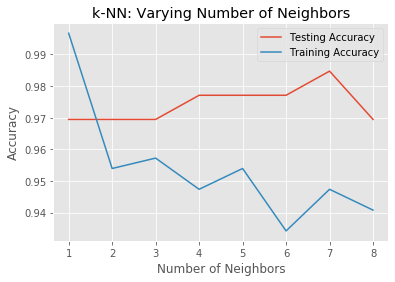

In [979]:
# Setup arrays to store train and test accuracies
import numpy as np 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like the test accuracy is highest when using 3 and 6 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

###### The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

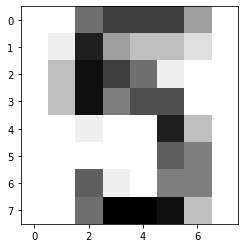

In [2]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


###### Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [5]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


###### Overfitting and underfitting

I will now construct such a curve for the digits dataset! I will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, I will develop an intuition for overfitting and underfitting.

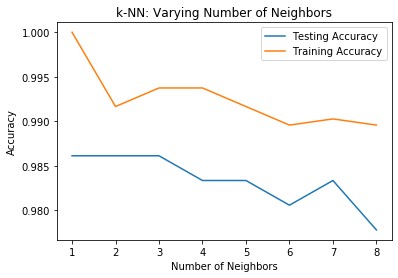

In [7]:
# Setup arrays to store train and test accuracies
import numpy as np 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

###### Regression Analysis in Scikit Learn 

###### Importing data for supervised learning

I will work with Gapminder data. The goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 

Since the target variable here is quantitative, this is a regression problem. To begin, I will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. Later I will use all the features to build regression models.

Before that, however, we need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since I am going to use only one feature to begin with, I need to do some reshaping using NumPy's .reshape() method. 

In [981]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

In [416]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [ ]:
df has 139 rows and 10 columns 

In [418]:
df.describe

<bound method NDFrame.describe of      population  fertility   HIV        CO2  BMI_male    GDP  BMI_female  \
0      34811059       2.73   0.1   3.328945  24.59620  12314    129.9049   
1      19842251       6.43   2.0   1.474353  22.25083   7103    130.1247   
2      40381860       2.24   0.5   4.785170  27.50170  14646    118.8915   
3       2975029       1.40   0.1   1.804106  25.35542   7383    132.8108   
4      21370348       1.96   0.1  18.016313  27.56373  41312    117.3755   
..          ...        ...   ...        ...       ...    ...         ...   
134     3350832       2.11   0.5   2.489764  26.39123  15317    124.2604   
135    26952719       2.46   0.1   4.476669  25.32054   3733    124.3462   
136    86589342       1.86   0.4   1.479347  20.91630   4085    121.9367   
137    13114579       5.88  13.6   0.148982  20.68321   3039    132.4493   
138    13495462       3.85  15.1   0.654323  22.02660   1286    131.9745   

     life  child_mortality                      Regio

In [415]:
# Creating array X for the 'fertility' feature and array y for the 'life' target variable.

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


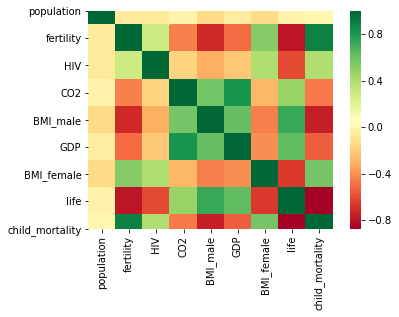

In [10]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

###### Exploring the Gapminder data

As always, it is important to explore the data before building models. The above heatmap is showing the correlation between the different features of the Gapminder dataset. Cells that are in green show positive correlation, while cells that are in red show negative correlation. 

Let's explore the DataFrame using pandas methods such as .info(), .describe(), .head().

The heatmap was generated using Seaborn's heatmap function where df.corr() computes the pairwise correlation between columns:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [12]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


The DataFrame has 139 samples (or rows) and 9 columns.
life and fertility are negatively correlated.
The mean of life is 69.602878.
GDP and life are positively correlated.

###### Fit & predict for regression

Now, I will fit a linear regression and predict life expectancy using just one feature. I will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. 

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis will be generated. 

In [1006]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [983]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df['fertility'].values

# Reshape X and y
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

Text(0, 0.5, 'Life')

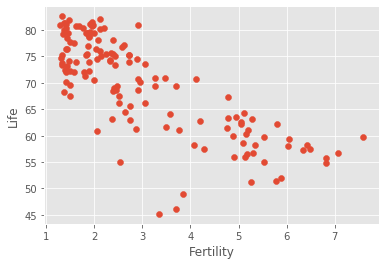

In [984]:
plt.scatter(X_fertility, y)
plt.xlabel('Fertility')
plt.ylabel('Life')

As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. The job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. I will also compute and print the R2 score using sckit-learn's .score() method.


0.6192442167740035


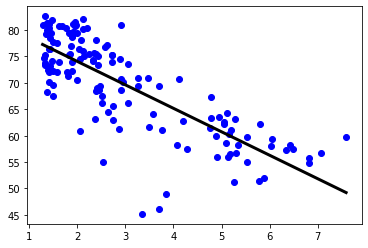

In [41]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
    color='black', linewidth=3)
plt.show()

###### Train/test split for regression

As we know, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

I will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, I will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. 

In [1007]:
# Creating X and y variables 
X = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']].values
y = df['life'].values

In [74]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731394423
Root Mean Squared Error: 3.2476010800727524


###### Cross validation: model performance metric 
    
There is a pitfall in train test split and computing model performance metrics on the test set. If you compute R squared on the test set, the R squared returned is dependent on the way that you split up the data. The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model’s ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation. We begin by splitting the dataset into five groups or folds. We hold out the first fold as a test set  fit our model on the remaining four folds and predict on the test set and compute the metric of interest. Next we hold out the second fold as our test set, fit on the remaining data and predict on the test set and compute the metric of interest. The similarly on the third, fourth and the fifth fold. As a result we get five values of R squared from which we can compute statistics of interest such as the mean, median and 95% confidence intervals. As we split the dataset in five folds, we call this process 5-folds cross validations, if we use 10 folds, it is called 10-fold cross validations. If we use k-fold it is called k-fold cross validations or k-fold CV. There is however, a trade-off as using more folds is more computationally expensive. This is because we are fitting and predicting more times. This method avoids the problem of the metric of choice being dependent on the train test split. 


###### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

Below I will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since I am performing 5-fold cross-validation, the function will return 5 scores. The job will be to compute these 5 scores and then take their average.

In [75]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X,y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722769974


After cross-validating the model, we can more confidently evaluate its predictions.

###### K-Fold CV comparison

Cross validation is essential but the more folds we use, the more computationally expensive cross-validation becomes. We will explore it here, we will perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

We can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)

In [76]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
%timeit cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
%timeit cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))


4.55 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782566719
13.9 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.843612862009748


We can see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation. 

###### Regularized Regression

What fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn’t easy to see in two dimensions, but when we have loads and loads of features, that is if the data is in high dimensional space with large coefficients it gets easy to predict nearly anything. For this reason, it is a common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. 

###### Ridge Regression 

We will look at ridge regression in which the loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to the data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients. The alpha parameter we need to choose in order to fit and predict. Essentially we can select the alpha for which the model performs best. Picking alpha for ridge regression is similar to picking k in KNN. This is called hyperparameter tuning. Alpha also controls model complexity. When alpha is equal to zero, we get back OLS. Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized which can lead to a model that is too simple and ends up underfitting the data. 
    
In some cases Normalization is also used. Normalization means that our variables are on the same scale. 

###### Lasso Regression

There is another type of regularized regression called lasso regression in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha. One of the really cool aspects of lasso regression is that it can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be exactly zero. The features whose coefficients are not shrunk to zero are selected by the LASSO algorithm. The power of reporting important features from a linear model cannot be overestimated. It is also valuable in research science, in order to identify which factors are important predictors for various physical phenomena. 



###### Regularization I: Lasso
    
Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

I will fit a lasso regression to the Gapminder data I have been working with and plot the coefficients. Just as with the Boston data, I will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays are as X and y.


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


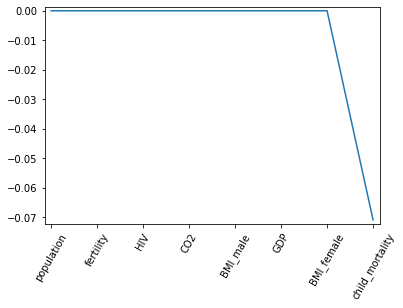

In [104]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
df_columns = df.drop(['life', 'Region'], axis =1).columns
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

###### Regularization II: Ridge
    
Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. I will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using below function, which plots the R2 score as well as standard error for each alpha:
    

In [101]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

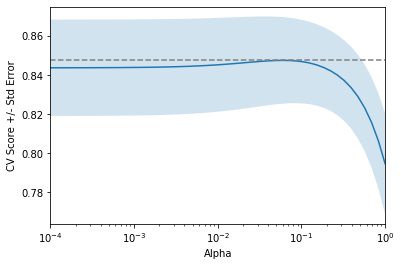

In [102]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import *
import seaborn as sns

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Notice how the cross-validation scores change with different alphas. Which alpha should we pick will come later. 

###### Fine tuning the model 
Having trained the model, my next task is to evaluate its performance. Below I will use some of the other metrics available in scikit-learn that will allow me to assess the model's performance in a more nuanced manner.

###### How good is your model

In classification we can use accuracy; the fraction of correctly classified samples to measure model performance. Accuracy is not always effective. Consider a spam classification problem in which 99% of emails are real and only 1% spam. A model that classifies all emails as real would be correct 99% of the time and thus have an accuracy of 99% which sounds great. However, this classifier does a bad job of predicting spam, it never predicts spam at all, so it completely fails. The situation when one class is more frequent is called class imbalance because the class of real emails contains way more instances than the class of spam. Given a binary classifier such as spam email example, we can draw up a 2 by 2 matrix that summarizes predictive performance called a confusion matrix. Usually the class of interest in the confusion matrix is the positive class. We can retrieve accuracy from the confusion matrix. 
Accuracy is: tp+tn/tp+tn+fp+fn
    
There are several other important metrics we can easily calculate from the confusion matrix. 
Precision = tp/tp+fp 

It is also called the positive predictive value or PPV. In the example of emails it will be the number of correctly labeled spam emails divided by the total number of emails classified as spam. 

Recall: the number of true positives divided by the total number of true positives and false negatives. 
 Recall = tp/tp+fn

This is also called sensitivity, hit rate, or true positive rate. 

F1 score: defined as two times the product of the precision and recall divided by the sum of precision and recall. In other words its harmonic mean of precision and recall. 

High precision means that our classifier had a low false positive rate. That is not many real emails were predicted as being spam. 

High recall means that our classifier predicted most positive or spam emails correctly. 



Accuracy is not always an informative metric. Here I will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

Classification report consists of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the spam email example, the support is the number of spams or not spams in the test set on which the classification report is computed. The precision, recall, and f1-score columns, then, give the respective metrics for that particular class.


###### Working on PIMA Indians dataset
Here, I will work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [986]:
df1 = pd.read_csv('diabetes.csv')

In [987]:
# Exploring the dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [988]:
df1.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [989]:
df1.shape

(768, 9)

In [990]:
# Defining X and y variables
y = df1['diabetes'].values
X = df1.drop('diabetes', axis=1).values

Zeros under insulin represent missing values. And triceps which is the thickness of the skin is zero. 

In [991]:
# Replacing zeros with NaN 
df1.insulin.replace(0,np.nan, inplace=True)
df1.triceps.replace(0,np.nan, inplace=True)
df1.bmi.replace(0,np.nan, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


Replacing missing vlaues with mean. 

In [996]:
from sklearn.preprocessing import Imputer 
imp = Imputer(missing_values='NaN', strategy ='mean', axis=0)
imp.fit(X)
X =imp.transform(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Now I will generate a train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.


In [998]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



###### Logistic regression and the ROC curve. 

Logistic regression is used in classification. Given one feature, log reg will output a probability p with respect to the target variable. If p is greater than 0.5 we label the data as 1, if p is less than 0.5 we label it 0. Log reg produces a linear decision boundary. In defining logistic regression, normally we specify a threshold of 0.5 for the probability, a threshold that defines our model. This is not particular for log reg but also could be used for KNN. We can vary this threshold and it has an impact on the true positive and false positive rates. When threshold equals zero, the model predicts 1 for all the data, which means the true positive rate is equal to the false positive rate. When the threshold equals 1, the model predicts 0 for all the data which means both true and false positive rates are equal to 0. If we vary the data between 0 and 1 we get a series of different false positive and true positive rates. The set of points we get when trying all possible thresholds is called the receiver operating characteristic curve or ROC curve. 


In [999]:
# Applying logistic regression model on the same diabetes data as above. 

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



###### Plotting ROC curve

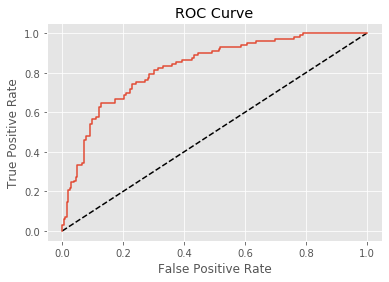

In [1000]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()




###### Area under the ROC Curve

Given the ROC curve, can we extract a metric of interest. The larger the area under ROC curve the better the model is. If we have a model which produced an ROC curve that had a single point at 1.0, the upper left corner, representing a TP rate of 1 and FP rat of 0. This would be a great model. This is why the area under the ROC, commonly denoted as AUC, is another popular metric for classification models. 


In [ ]:
###### AUC computation

If we have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [1001]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8268608414239482


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86584906 0.85037736]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


I now have a number of different methods you can use to evaluate your model's performance.

###### Hyperparameter tuning 

When we fit a linear regression, what we are really doing is choosing the parameters for the model that fit the data the best. I also had to choose a value for the alpha in ridge and lasso regression before fitting it. Analogously, before fitting and predicting K-nearest neighbors, I had to choose n neighbors. Such parameters, ones that need to be specified before fitting a model, are called hyperparameters. These parameters cannot be explicitly learned by fitting the model. Choosing the correct hyperparameter is the fundamental key for building a successful model. The basic idea is to try a bunch of different values fit all of them separately, see how well each of them performs and choose the best one. This is the hyper parameter tuning. 

When fitting different values of hyperparameters, it is essential to use cross-validation as using train test split alone would risk overfitting the hyperparameter to the test set. The basic idea is: we choose a grid of possible values we want to try for the hyperparameters. For example, if we had two hyperparameters, C and alpha, we will have a grid of values to test like a small table. We will then perform k-fold cross-validation for each point in the grid, this is, for each choice of hyperparameter or combination of hyperparameters. We then choose the best performing hyperparameters. This is called grid search. 


In [ ]:
I will now practice this  by using logistic regression on the diabetes dataset. 

Like the alpha parameter of lasso and ridge regularization, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what I will tune. A large C can lead to an overfit model, while a small C can lead to an underfit model.

I will set the hyperparameter space for C and use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

I have not split the data into training and test sets. I want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. Next I will hold out a portion of data for evaluation purposes.

In [1003]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. Below I'll practice using RandomizedSearchCV.

Here, I'll also be introduced to a new model: the Decision Tree. 

Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that can be used in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.
    

The feature array X and target variable array y of the diabetes dataset will be used. The goal is to use RandomizedSearchCV to find the optimal hyperparameters.



In [1004]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 8}
Best score is 0.73046875


Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

###### Hold out set for final evaluation

After using k-fold cross-validation to tune model’s hyperparameters, I may want to report how well my model will perform on unseen data, given scoring function of choice. The model can be used to predict on some labeled data, then comparing the predictions to the actual labels and compute the scoring function. However, if I used all my data for cross-validation, estimating the model performance on any of it may not provide an accurate picture of how it will perform on unseen data. For this reason, it is important to split all of the data at the very beginning into a training and hold-out set, then performing cross-validation on the training set to tune the model’s hyperparameters. After this, I can select the best hyperparameters and use the hold-out set which has not been used at all, to test how well the model can be expected to perform on a database that it has never seen before.  


###### Hold-out set in practice I: Classification
    
I will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset are X and y.

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. I will create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [1005]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

###### Hold-out set in practice II: Regression
    
Lasso uses the L1 penalty to regularize, while ridge uses the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

a∗L1+b∗L2

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

I will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As above, I will use a hold-out set to evaluate model's performance.

In [1008]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.48621759069863, tolerance: 0.5589415909090909
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.8466391552396, tolerance: 0.5893071666666667
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.50344008883852, tolerance: 0.5890250303030303
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.866830537239251
Tuned ElasticNet MSE: 10.057914133910316


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


It's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!

Preprocessing data to include categorical variables in the models. 

###### Exploring categorical features

The Gapminder dataset that I worked with above also contained a categorical 'Region' feature, which we dropped, now let's add it back.

I will explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

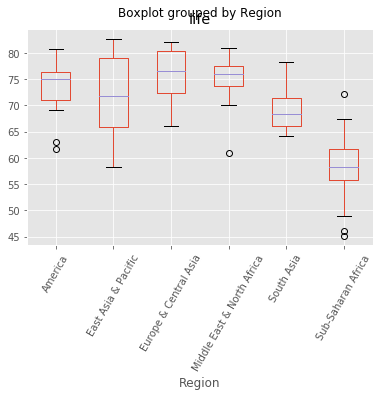

In [1153]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. 

###### Creating dummy variables

Scikit-learn does not accept non-numerical features. As seen above that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what I will do next. 

In [1154]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


###### Regression with categorical variables 

In [1011]:
# Creating X(response/independent) and y(target/dependent) variables 
y = df_region['life'].values
X = df_region.drop('life', axis=1).values

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


In [1012]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(normalize=True, alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [ ]:
print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))

###### Dropping missing data 
Here I will use voting data once again to demonstrate another way of computing missing values by replacing them with the most frequent values. Above I used Knn method to compute missing values in the same dataset. 

In [1013]:
# Importing the dataset 
# Creating list of column names for the data
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
# Load dataset: df_kidney
df = pd.read_csv('voting.csv', names=col_names,
                        na_values='?')
df.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [1014]:
# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in the dataset are missing, if we drop them, we may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, we can impute missing values with the mean or the median of the row or column that the missing value is in.

###### Imputing missing data in a ML Pipeline I

As we've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows us to piece together these steps into one process and thereby simplify the workflow.

I'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. I have worked on three classifiers in this document so far: k-NN, logistic regression, and the decision tree. I will now be working on a fourth one - the Support Vector Machine, or SVM. It has the same .fit() and .predict() methods as before.

In [1290]:
# Importing the dataset 
# Creating list of column names for the data
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
# Load dataset: df_kidney
df = pd.read_csv('voting.csv', names=col_names,
                        na_values='?')
df.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [1291]:
# Preprocessing data for pipeline
# Replacing label values with 0 and 1
df['party'].replace({'republican':0, 'democrat':1}, inplace=True)

In [1292]:
# Create dummy variables: df_region
df_party = pd.get_dummies(df)

# Print the columns of df_region
print(df_party.columns)

# Create dummy variables with drop_first=True: df_region
df_party = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_party.columns)


Index(['party', 'infants_n', 'infants_y', 'water_n', 'water_y', 'budget_n',
       'budget_y', 'physician_n', 'physician_y', 'salvador_n', 'salvador_y',
       'religious_n', 'religious_y', 'satellite_n', 'satellite_y', 'aid_n',
       'aid_y', 'missile_n', 'missile_y', 'immigration_n', 'immigration_y',
       'synfuels_n', 'synfuels_y', 'education_n', 'education_y', 'superfund_n',
       'superfund_y', 'crime_n', 'crime_y', 'duty_free_exports_n',
       'duty_free_exports_y', 'eaa_rsa_n', 'eaa_rsa_y'],
      dtype='object')
Index(['party', 'infants_y', 'water_y', 'budget_y', 'physician_y',
       'salvador_y', 'religious_y', 'satellite_y', 'aid_y', 'missile_y',
       'immigration_y', 'synfuels_y', 'education_y', 'superfund_y', 'crime_y',
       'duty_free_exports_y', 'eaa_rsa_y'],
      dtype='object')


In [1293]:
X = df_party.drop('party', axis =1).values
y = df_party['party'].values

In [1294]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


###### Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline above, I will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. I can use the .fit() and .predict() methods on pipelines just as I did with your classifiers and regressors!

In [1295]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        85

    accuracy                           0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



The pipeline has performed imputation as well as classification!

###### Using pipeline to compute logistic regression

In [1028]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp),
         ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9714285714285714

###### Centering and scaling your data

The performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

I will now explore scaling on a new dataset - White Wine Quality! I have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

In [1371]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1372]:
df['quality'] = df['quality'].apply(lambda x : 
                             '1' if x < 5 else '0')
df.quality = df.quality.astype('category')

In [1373]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [1374]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

In [1375]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X)))
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled)))
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072459593
Standard Deviation of Unscaled Features: 41.54494764094577
Mean of Scaled Features: 2.8000748664869607e-15
Standard Deviation of Scaled Features: 1.0


In [1376]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1377]:
def Quality(quality):
    if quality >= 5:
        return 0
    else:
        return 1

In [1378]:
df['Quality'] = df['quality'].apply(Quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [1379]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Quality                   int64
dtype: object

In [1380]:
# Creating X and y 
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['Quality']

In [1381]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = y_pred = cv.predict(X_test)

print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy without Scaling: 0.9653061224489796


In [1382]:
print(confusion_matrix(y_test, y_pred))

[[951   0]
 [ 29   0]]


In [1383]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.00      0.00      0.00        29

    accuracy                           0.97       980
   macro avg       0.49      0.50      0.49       980
weighted avg       0.94      0.97      0.96       980



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1229]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1230]:
def Quality(quality):
    if quality >= 5:
        return 0
    else:
        return 1

In [1231]:
df['Quality'] = df['quality'].apply(Quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [1232]:
# Creating X and y 
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['Quality']

In [1236]:
# Scale the features: X_scaled
X_scaled = scale(X)

In [1237]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_scaled = KNeighborsClassifier().fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = y_pred = cv.predict(X_test)

# Predict the labels of the test set: y_pred
y_pred = y_pred = cv.predict(X_test)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136


In [1369]:
print(confusion_matrix(y_test, y_pred))

[[951   0]
 [ 29   0]]


In [1238]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1239]:
def Quality(quality):
    if quality >= 5:
        return 0
    else:
        return 1

In [1240]:
df['Quality'] = df['quality'].apply(Quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


###### Applying KNN in a pipeline

In [1241]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creating X and y 
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['Quality']


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))


Accuracy with Scaling: 0.964625850340136


In [1242]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1243]:
def Quality(quality):
    if quality >= 5:
        return 0
    else:
        return 1

In [1244]:
df['Quality'] = df['quality'].apply(Quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [1245]:
# Creating X and y 
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['Quality']

In [1248]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.9693877551020408


In [1249]:
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


###### Using GridSearchCV and hyperparameter tuning gives best results as expected. 

###### Bringing it all together II: Pipeline for regression
    
For this final exercise, I will return to the Gapminder dataset. 

I will build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. I will then tune the l1_ratio of your ElasticNet using GridSearchCV.

In [1250]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

In [1253]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [1254]:
X = df_region.drop('life', axis=1).values
y = df_region['life'].values

In [1255]:
# Setup the pipeline steps: steps
steps = steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771035


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecat

Using the voting data to apply pre-processing to clean and prepare data for machine learning algorithms, applying pipeline to streamline the processes. 

###### Imputing missing data in a ML Pipeline I

There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

I'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. I will now use the Support Vector Machine, or SVM, it has the same .fit() and .predict() methods as before.

In [401]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Having set up the pipeline steps, classification can be used. 

###### Preprocessing data to include categorical variables in the models. 

In [1296]:
# Creating list of column names for the data
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
# Load dataset: df_kidney
df2 = pd.read_csv('voting.csv', names=col_names,
                        na_values='?')
df2.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


###### Exploratory EDA

I'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.

In [1297]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null object
water                387 non-null object
budget               424 non-null object
physician            424 non-null object
salvador             420 non-null object
religious            424 non-null object
satellite            421 non-null object
aid                  420 non-null object
missile              413 non-null object
immigration          428 non-null object
synfuels             414 non-null object
education            404 non-null object
superfund            410 non-null object
crime                418 non-null object
duty_free_exports    407 non-null object
eaa_rsa              331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


The DataFrame has a total of 435 rows and 17 columns.

All the columns are of type object.

The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.

There are 16 predictor variables, or features, in this DataFrame.

The target variable in this DataFrame is 'party'.

In [1298]:
# Replacing label values with 0 and 1
df2['party'].replace({'republican':0, 'democrat':1}, inplace=True)

In [1299]:
# Create dummy variables: df_region
df_party = pd.get_dummies(df2)

# Print the columns of df_region
print(df_party.columns)

# Create dummy variables with drop_first=True: df_region
df_party = pd.get_dummies(df2, drop_first=True)

# Print the new columns of df_region
print(df_party.columns)


Index(['party', 'infants_n', 'infants_y', 'water_n', 'water_y', 'budget_n',
       'budget_y', 'physician_n', 'physician_y', 'salvador_n', 'salvador_y',
       'religious_n', 'religious_y', 'satellite_n', 'satellite_y', 'aid_n',
       'aid_y', 'missile_n', 'missile_y', 'immigration_n', 'immigration_y',
       'synfuels_n', 'synfuels_y', 'education_n', 'education_y', 'superfund_n',
       'superfund_y', 'crime_n', 'crime_y', 'duty_free_exports_n',
       'duty_free_exports_y', 'eaa_rsa_n', 'eaa_rsa_y'],
      dtype='object')
Index(['party', 'infants_y', 'water_y', 'budget_y', 'physician_y',
       'salvador_y', 'religious_y', 'satellite_y', 'aid_y', 'missile_y',
       'immigration_y', 'synfuels_y', 'education_y', 'superfund_y', 'crime_y',
       'duty_free_exports_y', 'eaa_rsa_y'],
      dtype='object')


In [1300]:
df_party.head()

,party,infants_y,water_y,budget_y,physician_y,salvador_y,religious_y,satellite_y,aid_y,missile_y,immigration_y,synfuels_y,education_y,superfund_y,crime_y,duty_free_exports_y,eaa_rsa_y
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


###### Creating X and y as numpy arrays. This method requires new data to be in numpy array form to apply model on new data. 

In [1301]:
X = df_party.drop('party', axis =1).values
y = df_party['party'].values

In [1302]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1303]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        85

    accuracy                           0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


###### Creating new data as a numpy array. 

In [1370]:
x_new = np.array([[1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0]])
x_new.reshape(1, -1)

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]])

In [1305]:
y_pred = pipeline.predict(x_new)

In [1306]:
y_pred

array([0])

###### Using X and y as datafrmae columns to predict life through regression. This way helps to analyze the output more easily as it is in dataframe form that can be exported and visualized more easily. Through this method we can import new data as a dataframe and apply model on it easily. 

In [1307]:
# Creating list of column names for the data
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
# Load dataset: df_kidney
df2 = pd.read_csv('voting.csv', names=col_names,
                        na_values='?')
df2.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [1308]:
# Replace label values with 0 (ckd) and 1
df2['party'].replace({'republican':0, 'democrat':1}, inplace=True)

In [1309]:
# Create dummy variables: df_region
df_party = pd.get_dummies(df2)

# Print the columns of df_region
print(df_party.columns)

# Create dummy variables with drop_first=True: df_region
df_party = pd.get_dummies(df2, drop_first=True)

# Print the new columns of df_region
print(df_party.columns)


Index(['party', 'infants_n', 'infants_y', 'water_n', 'water_y', 'budget_n',
       'budget_y', 'physician_n', 'physician_y', 'salvador_n', 'salvador_y',
       'religious_n', 'religious_y', 'satellite_n', 'satellite_y', 'aid_n',
       'aid_y', 'missile_n', 'missile_y', 'immigration_n', 'immigration_y',
       'synfuels_n', 'synfuels_y', 'education_n', 'education_y', 'superfund_n',
       'superfund_y', 'crime_n', 'crime_y', 'duty_free_exports_n',
       'duty_free_exports_y', 'eaa_rsa_n', 'eaa_rsa_y'],
      dtype='object')
Index(['party', 'infants_y', 'water_y', 'budget_y', 'physician_y',
       'salvador_y', 'religious_y', 'satellite_y', 'aid_y', 'missile_y',
       'immigration_y', 'synfuels_y', 'education_y', 'superfund_y', 'crime_y',
       'duty_free_exports_y', 'eaa_rsa_y'],
      dtype='object')


In [1310]:
X = df_party[['infants_y', 'water_y', 'budget_y', 'physician_y',
       'salvador_y', 'religious_y', 'satellite_y', 'aid_y', 'missile_y',
       'immigration_y', 'synfuels_y', 'education_y', 'superfund_y', 'crime_y',
       'duty_free_exports_y', 'eaa_rsa_y']]
y = df_party['party']

In [1311]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1312]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        85

    accuracy                           0.97       131
   macro avg       0.96      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1316]:
x_new = pd.read_csv('x_new.csv')
x_new

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0


In [1314]:
y_pred = pipeline.predict(x_new)

In [1315]:
y_pred

array([1])

###### Another way of manipulation quality column in wine dataset and ranking wines as good and bad according to the assigned numbers in quality column. 

In [1317]:
df = pd.read_csv('whitewine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1319]:
quality = df["quality"].values
category = []
for num in quality:
    if num<=5:
        category.append("Bad")
    else:
        category.append("Good")

In [1320]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [1323]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good


In [1324]:
# Replace label values with 0 (ckd) and 1
data['category'].replace({'Good':1, 'Bad':0}, inplace=True)

In [1325]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [1327]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
category                  int64
dtype: object

In [1358]:
data['category'].value_counts()

1    3258
0    1640
Name: category, dtype: int64